In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['column_2C_weka.csv', 'column_3C_weka.csv']


In [2]:
data = pd.read_csv('../input/column_2C_weka.csv')
plt.style.use('ggplot')
data.count()

pelvic_incidence            310
pelvic_tilt numeric         310
lumbar_lordosis_angle       310
sacral_slope                310
pelvic_radius               310
degree_spondylolisthesis    310
class                       310
dtype: int64

In [3]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
atrybuty,etykiety = data.loc[:,data.columns != 'class'], data.loc[:,'class'] 
knn.fit(atrybuty,etykiety)
prediction = knn.predict(atrybuty)
print('Prediction: {}'.format(prediction))

Prediction: ['Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal'
 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Normal' 'Normal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Normal'
 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Ab

In [4]:
knn.score(atrybuty, etykiety)

0.9258064516129032

Zadanie 1

In [5]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
atrybuty,etykiety = data.loc[:,data.columns != 'class'], data.loc[:,'class'] 
knn.fit(atrybuty,etykiety)
knn.score(atrybuty, etykiety)

1.0

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
atrybuty,etykiety = data.loc[:,data.columns != 'class'], data.loc[:,'class'] 
knn.fit(atrybuty,etykiety)
knn.score(atrybuty, etykiety)

0.8935483870967742

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 15)
atrybuty,etykiety = data.loc[:,data.columns != 'class'], data.loc[:,'class'] 
knn.fit(atrybuty,etykiety)
knn.score(atrybuty, etykiety)

0.8612903225806452

Zadanie 2

In [8]:
newdata = {'pelvic_incidence': [50, 1],
           'pelvic_tilt numeric': [10, 1],
           'lumbar_lordosis_angle': [10, 1],
           'sacral_slope': [40, 1],
           'pelvic_radius': [130, 1],
           'degree_spondylolisthesis': [-1, 1]}
predict_data = pd.DataFrame(data=newdata)
predict_data

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,50,10,10,40,130,-1
1,1,1,1,1,1,1


In [9]:
print(knn.predict(predict_data))

['Normal' 'Abnormal']


Zadanie Domowe


In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(atrybuty, etykiety,test_size = 0.3,random_state = 1) 

For k=1 is: 0.8387096774193549
For k=2 is: 0.8279569892473119
For k=3 is: 0.8602150537634409
For k=4 is: 0.8387096774193549
For k=5 is: 0.8494623655913979
For k=6 is: 0.8387096774193549
For k=7 is: 0.8494623655913979
For k=8 is: 0.8602150537634409
For k=9 is: 0.8494623655913979
For k=10 is: 0.8387096774193549
For k=11 is: 0.8064516129032258
For k=12 is: 0.8494623655913979
For k=13 is: 0.8709677419354839
For k=14 is: 0.8709677419354839
For k=15 is: 0.8494623655913979
For k=16 is: 0.8709677419354839
For k=17 is: 0.8709677419354839
For k=18 is: 0.8817204301075269
For k=19 is: 0.8387096774193549
For k=20 is: 0.8709677419354839


<function matplotlib.pyplot.show(*args, **kw)>

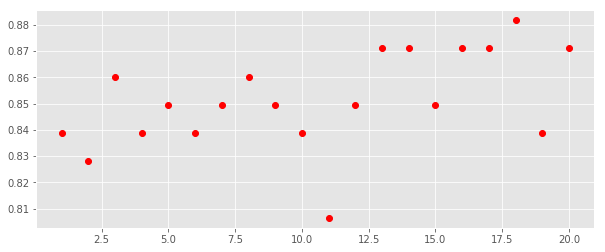

In [20]:
accuracy = []
numbers = [i for i in range(1, 21)]
for k in numbers:
    k_knn = KNeighborsClassifier(n_neighbors = k)
    k_knn.fit(x_train,y_train)
    score = k_knn.score(x_test, y_test)
    accuracy.append(score)
    print("For k=%s is:" % k , score )

plt.figure(1, figsize=(10, 4))
plt.plot(numbers, accuracy, 'ro')
plt.axis(option='scaled')
plt.show
    

zadanie 3

In [21]:
data2 = pd.read_csv('../input/column_3C_weka.csv')
print(data2['class'].unique())

['Hernia' 'Spondylolisthesis' 'Normal']


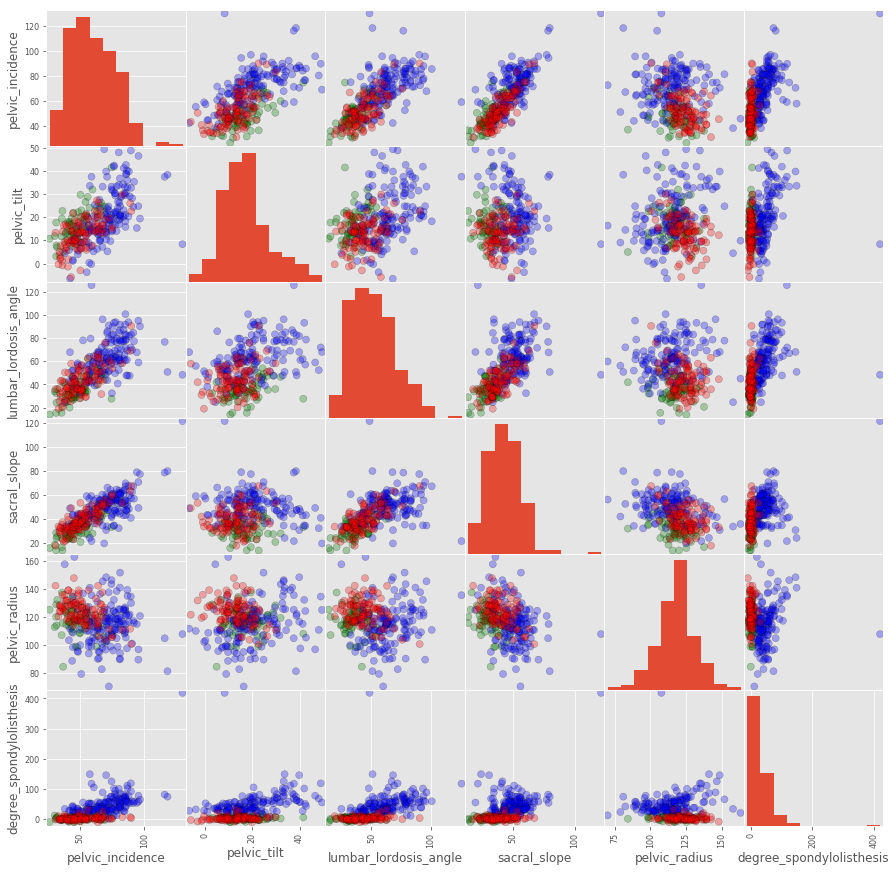

In [33]:
color_list = ['red' if i=='Normal' else ('green' if i=='Hernia' else 'blue') for i in data2.loc[:,'class']]
pd.plotting.scatter_matrix(data2.loc[:, data2.columns != 'class'],
                                       c=color_list,
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.3,
                                       s = 200,
                                       marker = '.',
                                       edgecolor= "black")
plt.show()